## Computing models of modular curves

In this notebook we compute explicit models of modular curves via modular forms.

Lets start with $X_0(11)$ as this is the first modular curve of genus 1.

To construct an explicit embedding of this  curve into projective space we use modular forms, those for $\Gamma_0(11)$ can be computed via:

In [2]:
M = ModularForms(11); M

Modular Forms space of dimension 2 for Congruence Subgroup Gamma0(11) of weight 2 over Rational Field

there is a 2-dimensional space of such forms, lets call basis elements $f$ and $g$

In [3]:
f,g = M.basis()
show(f)
show(g)

q - 2*q^2 - q^3 + 2*q^4 + q^5 + O(q^6)

1 + 12/5*q + 36/5*q^2 + 48/5*q^3 + 84/5*q^4 + 72/5*q^5 + O(q^6)

Note that $f$ is a cusp form but $g$ is not.

In [4]:
f.is_cuspidal(),g.is_cuspidal()

(True, False)

As differentials on the curve we have
$$\omega_1 = f(q) \frac{\mathrm{d} q}{q},\,\omega_2 = g(q) \frac{\mathrm{d} q}{q}$$
where $\omega_1$ is regular at the cusp $\infty$ and $\omega_2$ has a pole at $\infty$.

So in order to construct a model of this genus $1$ curve we will assume we have functions $x,y$ on the curve which as in a genus $1$ curve satisfy $y^2 = h(x)$ for a quartic polynomial $h(x)$.

Then $\mathrm d x/y$ and $x\mathrm d x/y$ are differentials on the curve which we can equate with $\omega_1, \omega_2$ to solve for $x,y$.

If
$$\omega_1 = \frac{\mathrm{d} x}{y},\,\omega_2 = \frac{x\mathrm{d} x}{y}$$
then
$$x = \omega_2/\omega_1 = g(q)\mathrm d q/f (q) \mathrm d q = g(q)/f(q)$$
and 
$$y = \mathrm d x /\omega_1 = q \mathrm d x /f (q)$$

In [5]:
x = g.qexp(20)/f.qexp(20)
show(x)

q^-1 + 22/5 + 17*q + 46*q^2 + 116*q^3 + 252*q^4 + 533*q^5 + 1034*q^6 + 1961*q^7 + 3540*q^8 + 6253*q^9 + 10654*q^10 + 17897*q^11 + 29284*q^12 + 47265*q^13 + 74868*q^14 + 117158*q^15 + 180608*q^16 + 275562*q^17 + O(q^18)

In [6]:
q = x.parent().gen()
y = q*x.derivative()/f.qexp(20)
show(y)

-q^-2 - 2*q^-1 + 12 + 116*q + 597*q^2 + 2298*q^3 + 7616*q^4 + 22396*q^5 + 60732*q^6 + 153682*q^7 + 368584*q^8 + 843150*q^9 + 1855509*q^10 + 3943764*q^11 + 8136120*q^12 + 16338586*q^13 + 32038879*q^14 + 61475598*q^15 + 115674856*q^16 + O(q^17)

Now if we assume that we have an equation of the form
$$y^2 = h(x)$$
for a quartic $h(x)$ we have to solve for the coefficients of $h$, given $y^2, x^4, x^3, x^2, x, 1$.

To do this we construct the relevant linear system, including terms up to degree $q^{-6}$.

In [7]:
def coeffs(G):                                                     
    return ([0]*(6+G.valuation()) +G.coefficients())[:16]
M = Matrix(list(map(coeffs, [y^2, x^4, x^3, x^2, x])) + [6*[0] + [1] + 9*[0]])
show(M.kernel())

Vector space of degree 6 and dimension 1 over Rational Field
Basis matrix:
[       1       -1     68/5   616/25  252/125 1504/625]

Hence the equation of our curve is
$$
y^2 = x^4 - \frac{68}5 x^3 - \frac{616}{25}x^2 - \frac{252}{125}x - \frac{1504}{625}
$$
or after a change of variables ($y \mapsto y/25,x \mapsto x/5$)
$$
y^2 = x^4 - 68 x^3 - 616x^2 - 252x - 1504
$$
we should do a little more cleanup to get to a nicer model with an odd degree polynomial in $x$. This amounts to moving a Weierstrass point to infinity.

Do we have any Weierstrass points here?:

In [8]:
X = polygen(QQ)
(X^4 - 68*X^3 - 616*X^2 - 252*X - 1504).factor()

(x + 8) * (x^3 - 76*x^2 - 8*x - 188)

Yes $x = -8$ is a rational Weierstrass point, to get the equation of the new curve we shift this point to $0$ and then take $x\mapsto1/x$, this has the effect of reversing the polynomial $h$.

In [9]:
(X^4 - 68*X^3 - 616*X^2 - 252*X - 1504).subs({X:X-8}).reverse()

-5500*x^3 + 1400*x^2 - 100*x + 1

$$ y^2 = -5500x^3 + 1400x^2 - 100x + 1$$
is now our model, one last change of variables gives.

In [10]:
(X^4 - 68*X^3 - 616*X^2 - 252*X - 1504).subs({X:X-8}).reverse().subs({X:X/(-5500)})*(-5500)^2

x^3 + 1400*x^2 + 550000*x + 30250000

$$y^2 =x^3 + 1400x^2 + 550000x + 30250000$$
Which, while the coefficients are a little excessive is in short weierstrass form, so we can use the standard Sage elliptic curve constructor now:

In [11]:
E = EllipticCurve([0, 1400, 0, 550000, 30250000]); show(E)

Elliptic Curve defined by y^2 = x^3 + 1400*x^2 + 550000*x + 30250000 over Rational Field

Lets minimise some more by hand.

In [32]:
from sage.schemes.elliptic_curves.weierstrass_morphism import WeierstrassIsomorphism
WeierstrassIsomorphism(E, [10,-95,0,0])

Generic morphism:
  From: Abelian group of points on Elliptic Curve defined by y^2 = x^3 + 1400*x^2 + 550000*x + 30250000 over Rational Field
  To:   Abelian group of points on Elliptic Curve defined by y^2 = x^3 + 223/20*x^2 + 12443/400*x - 81779/8000 over Rational Field
  Via:  (u,r,s,t) = (10, -95, 0, 0)

We can check that the conductor is $11$, and ask for a minimal model at this point:

In [12]:
E.conductor()

11

In [13]:
E.minimal_model()

Elliptic Curve defined by y^2 + y = x^3 - x^2 - 10*x - 20 over Rational Field

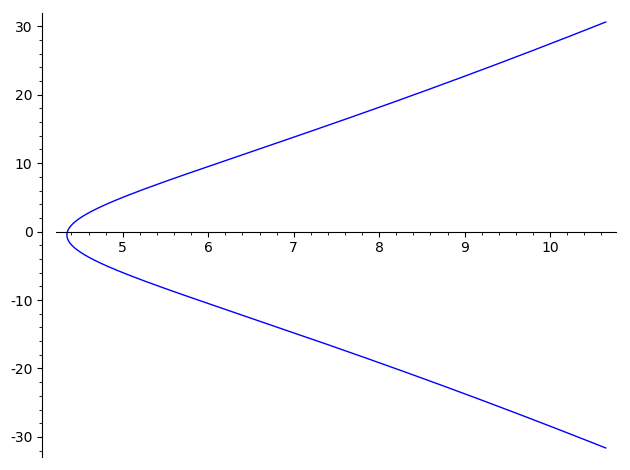

In [14]:
E.minimal_model().plot()

In [15]:
E.torsion_points()

[(0 : -5500 : 1),
 (0 : 1 : 0),
 (0 : 5500 : 1),
 (1100 : -60500 : 1),
 (1100 : 60500 : 1)]

In [133]:
x

q^-1 + 22/5 + 17*q + 46*q^2 + 116*q^3 + 252*q^4 + 533*q^5 + 1034*q^6 + 1961*q^7 + 3540*q^8 + 6253*q^9 + 10654*q^10 + 17897*q^11 + 29284*q^12 + 47265*q^13 + 74868*q^14 + 117158*q^15 + 180608*q^16 + 275562*q^17 + O(q^18)

In [234]:
R = X.parent()
Y = polygen(R)
X = polygen(QQ)

In [ ]:
while True:
    a,b,c = [R.random_element(4).change_ring(x.parent()) for i in range(3)]
    t = ((a*y + b)(x)/(c)(x))
    if t==j_invariant_qexp():
        print(a,b,c)
        break

In [184]:
j_invariant_qexp()/x

1 + 3698/5*q + 4840319/25*q^2 + 2578655582/125*q^3 + 481378586871/625*q^4 + 51553942539738/3125*q^5 + 3852337510853464/15625*q^6 + 222568747468231892/78125*q^7 + 10576976004236569551/390625*q^8 + 430587141861419674028/1953125*q^9 + 15447907677553178433834/9765625*q^10 + O(q^11)

In [157]:
a.change_ring(x.parent())

-x^3 - x^2 + 2

In [191]:
(x+x^2)*y

-q^-4 - 59/5*q^-3 - 1634/25*q^-2 - 3513/25*q^-1 + 23448/25 + 320089/25*q + 2256828/25*q^2 + 12240332/25*q^3 + 56489109/25*q^4 + 232082159/25*q^5 + 870949178/25*q^6 + 3035635158/25*q^7 + 9942681736/25*q^8 + 6173979969/5*q^9 + 91468270636/25*q^10 + 260038607301/25*q^11 + 142484130636/5*q^12 + 1887740154444/25*q^13 + 4852702195186/25*q^14 + O(q^15)

In [189]:
j_invariant_qexp()


q^-1 + 744 + 196884*q + 21493760*q^2 + 864299970*q^3 + 20245856256*q^4 + 333202640600*q^5 + 4252023300096*q^6 + 44656994071935*q^7 + 401490886656000*q^8 + 3176440229784420*q^9 + O(q^10)

In [199]:
(y + x^2)*5/2

17*q^-1 + 817/5 + 894*q + 3807*q^2 + 13467*q^3 + 42399*q^4 + 120986*q^5 + 321288*q^6 + 801687*q^7 + 1903010*q^8 + 4321941*q^9 + 9458793*q^10 + 20023014*q^11 + 41178633*q^12 + 82496655*q^13 + 161467076*q^14 + 309369801*q^15 + 581444286*q^16 + O(q^17)

In [200]:
196884.factor()

2^2 * 3^3 * 1823

In [210]:
-y/x +461/125*x/y

q^-1 - 12/5 - 2766/125*q - 30572/625*q^2 - 25261/125*q^3 - 2409232/3125*q^4 - 66241466/15625*q^5 - 1953300148/78125*q^6 - 63520612569/390625*q^7 - 2088245819832/1953125*q^8 - 69319260960871/9765625*q^9 - 2301907107267988/48828125*q^10 - 76527821040163214/244140625*q^11 - 2543840016876692392/1220703125*q^12 - 84569975016363232301/6103515625*q^13 - 2811451661646683193528/30517578125*q^14 - 93465642522048828570459/152587890625*q^15 - 3107213950795010704899752/762939453125*q^16 - 103297855016948728850561256/3814697265625*q^17 + O(q^18)

In [204]:
x^2/y^2

q^2 + 24/5*q^3 + 1354/25*q^4 + 10024/25*q^5 + 81579/25*q^6 + 617184/25*q^7 + 934622/5*q^8 + 34643256/25*q^9 + 254717217/25*q^10 + 1853893888/25*q^11 + 13397187174/25*q^12 + 3847300960*q^13 + 686793551622/25*q^14 + 4880711423544/25*q^15 + 34541340707856/25*q^16 + 243557171856496/25*q^17 + 1711777679458878/25*q^18 + 11995727368858032/25*q^19 + 16768550891329602/5*q^20 + O(q^21)

-q - 12/5*q^2 - 121/5*q^3 - 712/5*q^4 - 997*q^5 - 32524/5*q^6 - 217922/5*q^7 - 1444368/5*q^8 - 9615086/5*q^9 - 63900956/5*q^10 - 424944047/5*q^11 - 2825221384/5*q^12 - 18785116252/5*q^13 - 24979819272*q^14 - 830445101493/5*q^15 - 1104307833056*q^16 - 36712191805566/5*q^17 - 244095690004424/5*q^18 - 1622968340675832/5*q^19 + O(q^20)

In [219]:
f*f, f*g, g*g

(q^2 - 4*q^3 + 2*q^4 + 8*q^5 + O(q^6),
 q + 2/5*q^2 + 7/5*q^3 - 26/5*q^4 - 19/5*q^5 + O(q^6),
 1 + 24/5*q + 504/25*q^2 + 1344/25*q^3 + 3288/25*q^4 + 6192/25*q^5 + O(q^6))

In [214]:
ModularForms(1, 4)

Modular Forms space of dimension 1 for Modular Group SL(2,Z) of weight 4 over Rational Field

In [220]:
E4 = EisensteinForms(1,4).basis()[0].qexp(20)

In [237]:
x/y 

-q - 12/5*q^2 - 121/5*q^3 - 712/5*q^4 - 997*q^5 - 32524/5*q^6 - 217922/5*q^7 - 1444368/5*q^8 - 9615086/5*q^9 - 63900956/5*q^10 - 424944047/5*q^11 - 2825221384/5*q^12 - 18785116252/5*q^13 - 24979819272*q^14 - 830445101493/5*q^15 - 1104307833056*q^16 - 36712191805566/5*q^17 - 244095690004424/5*q^18 - 1622968340675832/5*q^19 + O(q^20)

In [238]:
1 + j_invariant_qexp().subs({q:q^11})

q^-11 + 744 + 196884*q^11 + 21493760*q^22 + 864299970*q^33 + 20245856256*q^44 + 333202640600*q^55 + 4252023300096*q^66 + 44656994071935*q^77 + 401490886656000*q^88 + 3176440229784420*q^99 + O(q^110)

In [242]:
j = j_invariant_qexp();j
j11 = j_invariant_qexp().subs({q:q^11});j11

q^-11 + 744 + 196884*q^11 + 21493760*q^22 + 864299970*q^33 + 20245856256*q^44 + 333202640600*q^55 + 4252023300096*q^66 + 44656994071935*q^77 + 401490886656000*q^88 + 3176440229784420*q^99 + O(q^110)

In [243]:
j/(1 + j11)

q^10 + 744*q^11 + 196884*q^12 + 21493760*q^13 + 864299970*q^14 + 20245856256*q^15 + 333202640600*q^16 + 4252023300096*q^17 + 44656994071935*q^18 + 401490886656000*q^19 + 3176440229784420*q^20 + O(q^21)

In [245]:
j^10/j11

q + 7440*q^2 + 26877960*q^3 + 62817984320*q^4 + 106770313243620*q^5 + 140660772823411488*q^6 + 149490892875283472000*q^7 + 131713591850984107693440*q^8 + 98125437737029184633852010*q^9 + 62733460509022292428593705840*q^10 + 34814223673373739517987732202304*q^11 + O(q^12)

In [257]:
list(y/x) #+ j^10/j11

[-1,
 12/5,
 461/25,
 5008/125,
 70524/625,
 768072/3125,
 8789341/15625,
 79104648/78125,
 731836319/390625,
 7453169832/1953125,
 60594617121/9765625,
 474238830488/48828125,
 4693826491339/244140625,
 37169173567392/1220703125,
 262202183544801/6103515625,
 2275808792568528/30517578125,
 19526864990679834/152587890625,
 138302237267399752/762939453125,
 876531700041967506/3814697265625]